**Python version:**  3.x

In [3]:
# set the path of the directories where your modules and files are
modules_path = 'C:\\Users\loren\Documents\Progetti\__repo__\_myModules'
files_path = 'C:\\Users\loren\Documents\Progetti\Scuola\DataMining_Advanced\_files'

#### Moduli

In [4]:
import os
import sys

if os.path.isdir(modules_path) and modules_path not in sys.path:
    sys.path.append(modules_path)

modulesList = os.listdir(modules_path)
print('Available Modules for the project:', modulesList,sep='\n', end='\n\n')

filesList = os.listdir(files_path)
print('Available Files for the project:', filesList,sep='\n')

%matplotlib inline

import df_handle
import data_understanding
import data_preparation
import modeling
import model_evaluation

Available Modules for the project:
['data_preparation.py', 'data_understanding.py', 'df_handle.py', 'modeling.py', 'model_evaluation.py', '__pycache__']

Available Files for the project:
['datatest.txt', 'datatest2.txt', 'datatraining.txt', 'test1.csv', 'test2.csv', 'training.csv']


In [40]:
df, ts = df_handle.import_df(file_name='dataset.csv', search_in_folder=files_path,
                             date_col_name='date', ts_name='Temperature', time_freq='min')
df

,Temperature,Humidity,Light,CO2,HumidityRatio,year,month,day,hour,minute,second
date,,,,,,,,,,,
2015-02-02 14:19:00,23.7000,26.2720,585.200000,749.200000,0.004764,2015,2,2,14,19,0
2015-02-02 14:20:00,23.7180,26.2900,578.400000,760.400000,0.004773,2015,2,2,14,20,0
2015-02-02 14:21:00,23.7300,26.2300,572.666667,769.666667,0.004765,2015,2,2,14,21,0
2015-02-02 14:22:00,23.7225,26.1250,493.750000,774.750000,0.004744,2015,2,2,14,22,0
2015-02-02 14:23:00,23.7540,26.2000,488.600000,779.000000,0.004767,2015,2,2,14,23,0
...,...,...,...,...,...,...,...,...,...,...,...
2015-02-18 09:15:00,20.8150,27.7175,429.750000,1505.250000,0.004213,2015,2,18,9,15,0
2015-02-18 09:16:00,20.8650,27.7450,423.500000,1514.500000,0.004230,2015,2,18,9,16,0
2015-02-18 09:17:00,20.8900,27.7450,423.500000,1521.500000,0.004237,2015,2,18,9,17,0


In [47]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

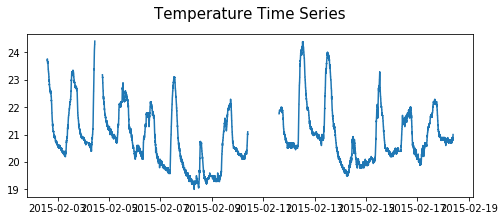

In [35]:
plt.figure(figsize=(8,3))
plt.plot(ts)
plt.title('Temperature Time Series', pad=15, size=15)
plt.show()

In [41]:
del df['year'], df['month'], df['day'], df['hour'], df['minute'], df['second']

In [42]:
df

,Temperature,Humidity,Light,CO2,HumidityRatio
date,,,,,
2015-02-02 14:19:00,23.7000,26.2720,585.200000,749.200000,0.004764
2015-02-02 14:20:00,23.7180,26.2900,578.400000,760.400000,0.004773
2015-02-02 14:21:00,23.7300,26.2300,572.666667,769.666667,0.004765
2015-02-02 14:22:00,23.7225,26.1250,493.750000,774.750000,0.004744
2015-02-02 14:23:00,23.7540,26.2000,488.600000,779.000000,0.004767
...,...,...,...,...,...
2015-02-18 09:15:00,20.8150,27.7175,429.750000,1505.250000,0.004213
2015-02-18 09:16:00,20.8650,27.7450,423.500000,1514.500000,0.004230
2015-02-18 09:17:00,20.8900,27.7450,423.500000,1521.500000,0.004237


In [37]:
df['Light'].describe()

count    20560.000000
mean       130.756622
std        210.430875
min          0.000000
25%          0.000000
50%          0.000000
75%        301.000000
max       1697.250000
Name: Light, dtype: float64

In [60]:
np.percentile(df['Light'], 99)

744.0

In [66]:
df['Light'].loc[df['Light'] > 744]

date
2015-02-04 09:39:00     767.000000
2015-02-04 09:40:00    1419.500000
2015-02-04 09:41:00    1697.250000
2015-02-04 09:42:00    1209.800000
2015-02-04 10:07:00     747.000000
                          ...     
2015-02-13 12:41:00     767.000000
2015-02-13 12:42:00     751.000000
2015-02-13 12:43:00     748.333333
2015-02-13 12:44:00     745.000000
2015-02-13 12:51:00     749.333333
Name: Light, Length: 205, dtype: float64

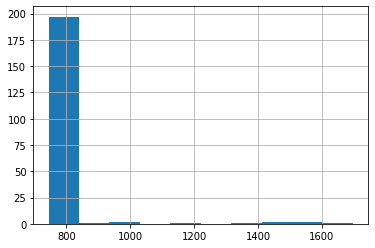

In [76]:
df['Light'].loc[df['Light'] >= 744].hist()

In [43]:
from sklearn.cluster import DBSCAN

In [45]:
dbscan = DBSCAN(eps=100, min_samples=4)
dbscan.fit(df)

DBSCAN(algorithm='auto', eps=100, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=4, n_jobs=None, p=None)

In [48]:
np.unique(dbscan.labels_, return_counts=True)

(array([-1,  0,  1], dtype=int64), array([   13, 20543,     4], dtype=int64))

In [50]:
df.loc[dbscan.labels_==-1]

,Temperature,Humidity,Light,CO2,HumidityRatio
date,,,,,
2015-02-04 09:40:00,22.600000,25.472500,1419.500000,945.000000,0.004319
2015-02-04 09:41:00,22.700000,25.500000,1697.250000,951.750000,0.004350
2015-02-04 09:42:00,22.700000,25.456000,1209.800000,958.600000,0.004343
2015-02-07 09:42:00,20.700000,18.890000,1546.333333,455.333333,0.002845
2015-02-07 09:43:00,20.745000,18.890000,1451.750000,453.000000,0.002853
2015-02-07 09:44:00,20.760000,18.856667,829.000000,452.666667,0.002850
2015-02-09 18:04:00,22.100000,37.790000,209.500000,1788.500000,0.006234
2015-02-12 09:46:00,22.772000,25.290000,1380.000000,1202.500000,0.004333
2015-02-12 09:47:00,22.790000,25.290000,1581.000000,1211.500000,0.004338


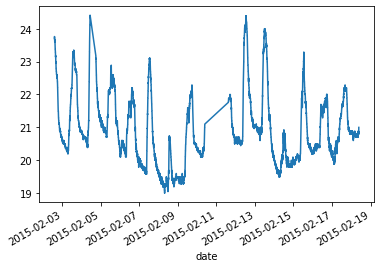

In [53]:
df['Temperature'].plot()

In [ ]:
from sklearn.neighbors import LocalOutlierFactor

In [ ]:
clf = LocalOutlierFactor(n_neighbors=2)
outliers = clf.fit_predict(X)

In [ ]:
clf.negative_outlier_factor_

In [ ]:
np.unique(outliers, return_counts=True)

In [ ]:
np.where(outliers==-1)

In [ ]:
clf.negative_outlier_factor_[np.where(outliers==-1)]

In [ ]:
np.max(clf.negative_outlier_factor_[np.where(outliers==-1)])

In [ ]:
plt.hist(clf.negative_outlier_factor_)
plt.axvline(-1.5)
plt.text(-2, 600, 'outliers')
plt.show()

In [ ]:
np.random.seed(42)

# Generate train data
X_inliers = 0.3 * np.random.randn(100, 2)
X_inliers = np.r_[X_inliers + 2, X_inliers - 2]

# Generate some outliers
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))
Xa = np.r_[X_inliers, X_outliers]

n_outliers = len(X_outliers)
ground_truth = np.ones(len(Xa), dtype=int)
ground_truth[-n_outliers:] = -1

# fit the model for outlier detection (default)
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
# use fit_predict to compute the predicted labels of the training samples
# (when LOF is used for outlier detection, the estimator has no predict,
# decision_function and score_samples methods).
y_pred = clf.fit_predict(Xa)
n_errors = (y_pred != ground_truth).sum()
X_scores = clf.negative_outlier_factor_

plt.title("Local Outlier Factor (LOF)")
plt.scatter(X[:, 0], X[:, 1], color='k', s=3., label='Data points')
# plot circles with radius proportional to the outlier scores
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
plt.scatter(Xa[:, 0], Xa[:, 1], s=1000 * radius, edgecolors='r',
            facecolors='none', label='Outlier scores')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.xlabel("prediction errors: %d" % (n_errors))
legend = plt.legend(loc='upper left')
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]
plt.show()

In [ ]:
from sklearn.ensemble import IsolationForest

In [ ]:
clf = IsolationForest(random_state=0)
clf.fit(X_train)

In [ ]:
outliers = clf.predict(X_test)

In [ ]:
np.unique(outliers, return_counts=True)

In [ ]:
from pyclustering.cluster import xmeans

In [ ]:
xm = xmeans.xmeans(X)
xm.process()

In [ ]:
clusters = xm.get_clusters()

In [ ]:
centers = xm.get_centers()

In [ ]:
i = df.columns.values.tolist().index('account length')
j = df.columns.values.tolist().index('total day minutes')

In [ ]:
for indexes in clusters:
    plt.scatter(X[indexes,i], X[indexes,j], alpha=0.4)
for c in centers:
    plt.scatter(c[i], c[j], s=100, edgecolors='k')